In [1]:
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
!!curl -O http://www.manythings.org/anki/ben-eng.zip
!!unzip ben-eng.zip


['Archive:  ben-eng.zip',
 'replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n',
 'replace ben.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n']

SEE CODE in Colab 

https://drive.google.com/drive/folders/1Xkj58y-wJlPy3GbT-QohvMTtzj1-FZM_

In [3]:
!ls


_about.txt  ben-eng.zip  ben.txt  contraction_expansion.txt  sample_data


In [4]:
df = pd.read_csv('ben.txt',encoding='utf-8', sep='	',  names=['English', 'Bengali', 'Attribution'])


In [5]:
df.head()


,English,Bengali,Attribution
0,Go.,যাও।,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,যান।,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,যা।,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Run!,পালাও!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,পালান!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [6]:
df.drop(['Attribution'], axis=1, inplace=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  4617 non-null   object
 1   Bengali  4617 non-null   object
dtypes: object(2)
memory usage: 72.3+ KB


In [8]:
df.isna().sum()


English    0
Bengali    0
dtype: int64

clean text
remove mutiple spaces

In [9]:

df.English = df.English.apply(lambda x: " ".join(x.split()))
df.Marathi = df.Bengali.apply(lambda x: " ".join(x.split()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


lowercare only english characters beause marathi dont have lower and uppercaser


In [10]:
df.English = df.English.apply(lambda x: x.lower())


In [11]:
df

,English,Bengali
0,go.,যাও।
1,go.,যান।
2,go.,যা।
3,run!,পালাও!
4,run!,পালান!
...,...,...
4612,tom seemed quite surprised when he heard that ...,টম যখন শুনলো যে মেরি আরে জন বিয়ে করেছে তখন তা...
4613,i think it's highly unlikely that tom will be ...,আমার মনে হয় টম যে সোনা পেয়েছে সেটা তার কাছে ...
4614,tom told mary that he was going to kill himsel...,"টম মেরিকে বললো যে ও নিজেকে হত্যা করতে চলেছিলো,..."
4615,tom's an irritating person to work with becaus...,টমের সঙ্গে কাজ করা খুব বিরক্তিকর কারণ ও কখনই ম...


In [12]:


# import base64
# import requests

# master = "https://github.com/AdiShirsath/Neural-Machine-Translation/raw/master/Data/contraction_expansion.txt"
# req = requests.get(master)
# contractions = req.text
# print(contractions)


import pandas as pd

contractions = pd.read_pickle('https://github.com/AdiShirsath/Neural-Machine-Translation/blob/master/Data/contraction_expansion.txt?raw=true')
print(contractions)

{"ain't": 'am not', "aren't": 'are not', "can't": 'cannot', "can't've": 'cannot have', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he will have', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how does', "i'd": 'i would', "i'd've": 'i would have', "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't

In [13]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text
    

In [14]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)

'i am do not he will you will'

In [15]:
df.English = df.English.apply(lambda x: expand_contras(x))


In [16]:
df.sample(5)


,English,Bengali
3418,i thought tom was different.,আমি ভেবছিলাম টম অন্যরকম।
3236,do you know a good dentist?,আপনি কি কোনো ভালো দাঁতের ডাক্তারকে চেনেন?
3176,tom died three days later.,টম তিন দিন পর মারা গেলো।
3802,i do not know when i will be back.,কখন ফিরে আসবো আমি জানি না।
117,wake up.,ঘুম থেকে উঠুন।


remove all punctuations

In [17]:
translator= str.maketrans('','', string.punctuation)


In [18]:
df.English= df.English.apply(lambda x: x.translate(translator))
df.Marathi= df.Bengali.apply(lambda x: x.translate(translator))

In [19]:
df.sample(5)


,English,Bengali
3408,i got up at 8 of the clock today,আমি আজ ৮টার সময় উঠেছি।
3123,how old is the oldest one,বড় জনের বয়স কত?
4266,tom has been working here since 2013,টম এখানে ২০১৩ থেকে কাজ করছে।
4528,some of them are teachers and some are engineers,"তাদের মধ্যে কেউ কেউ শিক্ষক, আর কেউ কেউ ইঞ্জিনি..."
2424,do you have a bicycle,তোমার কি সাইকেল আছে?


Remove digits


In [20]:
import re
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

Visualize some features of dataset
create new column for count of words

In [22]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['ben_word_count']= df.Bengali.apply(lambda x: len(x.split()))

create new column for charachters

In [28]:
df['ben_char_count']= df.Bengali.apply(lambda x: len("".join(x.split())))
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))

In [29]:
df.head()


,English,Bengali,en_word_count,mar_word_count,ben_word_count,ben_char_count,en_char_count
0,go,যাও।,1,1,1,4,2
1,go,যান।,1,1,1,4,2
2,go,যা।,1,1,1,3,2
3,run,পালাও!,1,1,1,6,3
4,run,পালান!,1,1,1,6,3


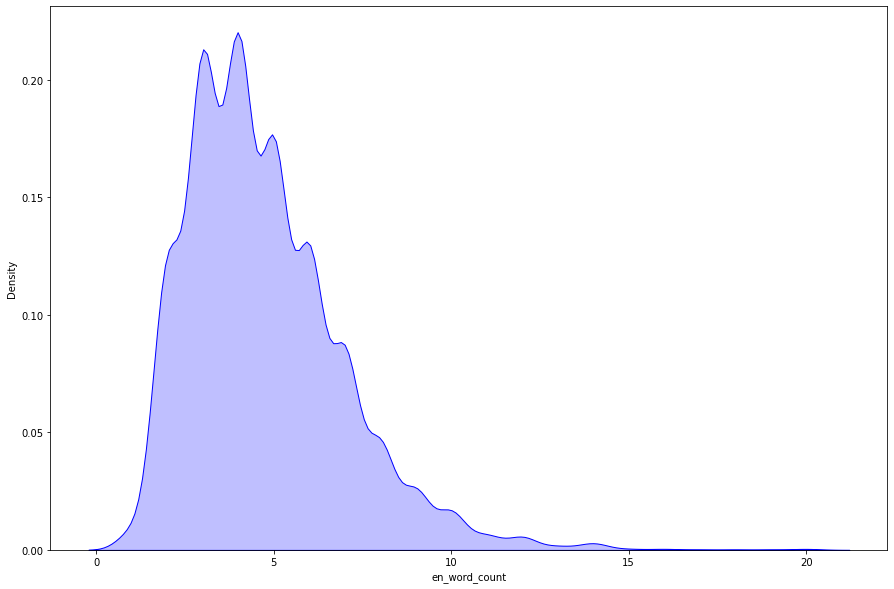

In [30]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')

note lot of sentences are of 4 to 7 length


In [31]:
max(df.en_word_count)


20

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.ben_word_count, shade=True, color='green', label='Real')

In [34]:
max(df.ben_word_count)


18

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


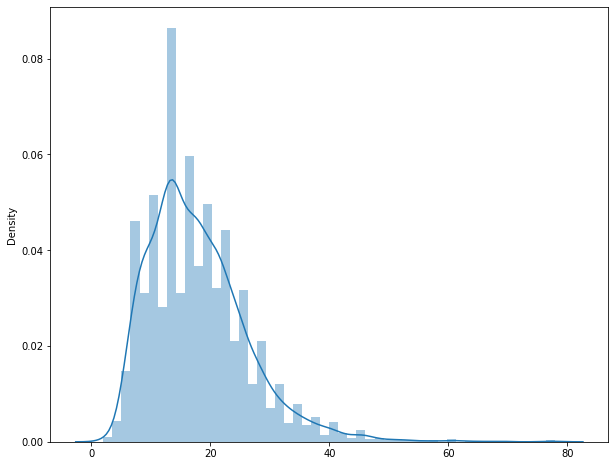

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.en_char_count)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


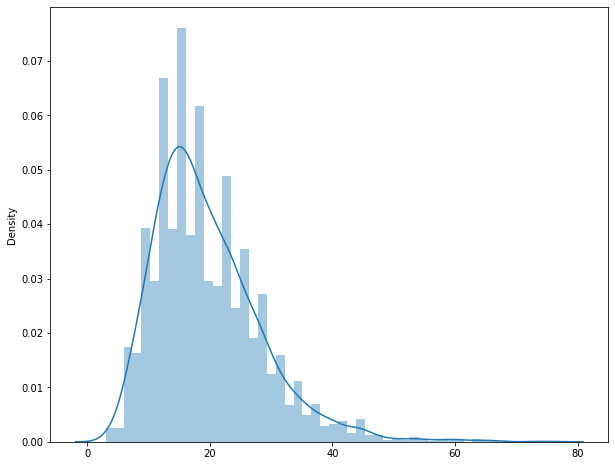

In [40]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.ben_char_count)

Plot wordcloud

In [41]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
        

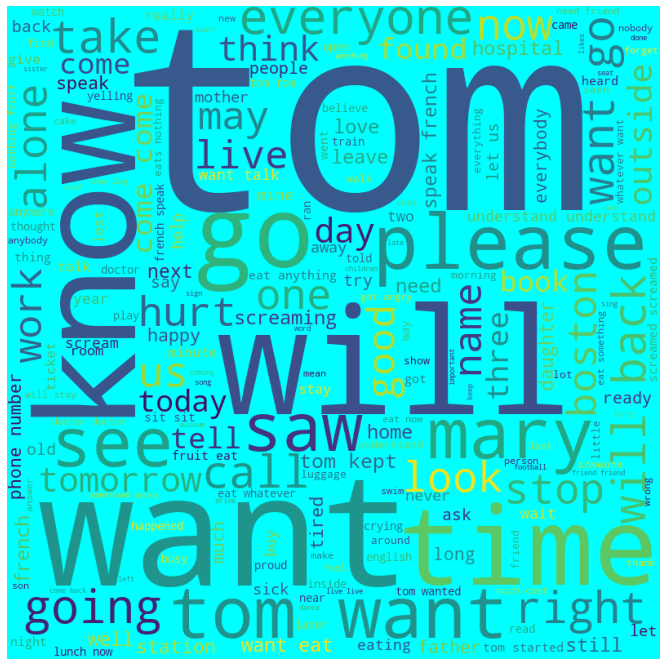

In [44]:
plot_word_cloud(df.English)


saved clean dataset

In [45]:
df.head()


,English,Bengali,en_word_count,mar_word_count,ben_word_count,ben_char_count,en_char_count
0,go,যাও।,1,1,1,4,2
1,go,যান।,1,1,1,4,2
2,go,যা।,1,1,1,3,2
3,run,পালাও!,1,1,1,6,3
4,run,পালান!,1,1,1,6,3


In [53]:
mkdir Data

df.to_csv("Data/cleaned.csv",index=None)



In [58]:
!zip -r Data.zip Data/ 

  adding: Data/ (stored 0%)
  adding: Data/cleaned.csv (deflated 79%)
  adding: Data/.zip (stored 0%)


In [59]:
ls

_about.txt   ben.txt                    Data/     sample_data/
ben-eng.zip  contraction_expansion.txt  Data.zip


In [61]:
!!unzip Data.zip


['Archive:  Data.zip',
 'replace Data/cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r',
 'new name: anot',
 '  inflating: anot                    ',
 'replace Data/.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: see',
 'error:  invalid response [see]',
 'replace Data/.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: r',
 'new name: see.csv',
 ' extracting: see.csv                 ']